# US Airline Data 2018

In [251]:
import pandas as pd
import numpy as np

In [252]:
data2018 = pd.read_csv('2018.csv')

In [253]:
#Display info of dataset
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [254]:
# Records = 7213446
# Columns/Attributes = 28

In [255]:
#Preview of columns before cleaning the data
data2018.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [420]:
data2018.shape[0]

7213442

# 

# 

# -----------------------------------------------------------------------------------------

# Data cleaning and formatting

In [256]:
#Dropping specific columns to reduce dimensionality 
#and attributes that cannot be used for analysis or are not of interest
#or attributes/columns with not enough values 

columns_to_drop = ['OP_CARRIER_FL_NUM', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME']
data2018.drop(columns_to_drop, inplace=True, axis=1)

In [257]:
#Preview of columns after removing specific columns
data2018.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,-23.0,0.0,NaN,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,LAS,SFO,1115,1107.0,-8.0,1254,1230.0,-24.0,0.0,NaN,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,SNA,DEN,1335,1330.0,-5.0,1649,1636.0,-13.0,0.0,NaN,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,RSW,ORD,1546,1552.0,6.0,1756,1754.0,-2.0,0.0,NaN,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,ORD,ALB,630,650.0,20.0,922,936.0,14.0,0.0,NaN,723.0,NaN,NaN,NaN,NaN,NaN,NaN


### Rename airline abbreviations to full airline company names

In [258]:
#Finding the unique airline company names in the "OP_CARRIER" column

data2018.OP_CARRIER.unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [259]:
#Replacing abbreviations with full names
# Source of airline abbreviations/names: https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States

data2018['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

In [260]:
#Checking of unique airline company names in the "OP_CARRIER" column

data2018.OP_CARRIER.unique()

array(['United Airlines', 'Alaska Airlines', 'Endeavor Air',
       'JetBlue Airways', 'ExpressJet', 'Frontier Airlines',
       'Allegiant Air', 'Hawaiian Airlines', 'Envoy Air',
       'Spirit Airlines', 'PSA Airlines', 'SkyWest Airlines',
       'Virgin America', 'Southwest Airlines', 'Mesa Airline',
       'Republic Airways', 'American Airlines', 'Delta Airlines'],
      dtype=object)

In [418]:
#Check for missing/null values in the dataset

data2018.isnull().shape[0]

7213442

### Remove rows that are null

In [262]:
#Remove rows/records with null values in 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME'

#data2018.dropna(subset=['DEP_TIME', 'DEP_DELAY', 'ARR_TIME'],inplace=True)
#data2018.isnull().sum()

In [263]:
#Count current number of records in dataset
data2018.count()

FL_DATE                7213446
OP_CARRIER             7213446
ORIGIN                 7213446
DEST                   7213446
CRS_DEP_TIME           7213446
DEP_TIME               7101129
DEP_DELAY              7096212
CRS_ARR_TIME           7213446
ARR_TIME               7094201
ARR_DELAY              7076406
CANCELLED              7213446
CANCELLATION_CODE       116584
DISTANCE               7213446
CARRIER_DELAY          1352710
WEATHER_DELAY          1352710
NAS_DELAY              1352710
SECURITY_DELAY         1352710
LATE_AIRCRAFT_DELAY    1352710
Unnamed: 27                  0
dtype: int64

###### ***Discovered that I need the rows with null values in the columns 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME' because null represents a value of a cancelled flight.

In [264]:
#Drop duplicates of rows if any

data2018.drop_duplicates(inplace=True)

In [419]:
#Check number of records after dropping duplicates
data2018.shape[0]

7213442

In [266]:
#Unfortunately (or maybe fortunately) not much at all to clean/filter out in this dataset

### Creating 2 new columns to represent dates as "months" and "weekday"

In [267]:
#Formatting of date
data2018['date'] = pd.to_datetime(data2018['FL_DATE'])
data2018['date'] = pd.to_datetime(data2018['date'],format='%m/%d/%y')

In [268]:
data2018['weekday'] = pd.to_datetime(data2018['date'], format='%m/%d/%y').dt.day_name()

In [270]:
data2018.weekday.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [271]:
data2018['month'] = pd.to_datetime(data2018['date'], format='%m').dt.month_name().str.slice(stop=3)
data2018.month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

# 

# -----------------------------------------------------------------------------------------

# 


# Data Analysis


### Gathering cancelled flights into a new variable

In [343]:
#Understanding the "CANCELLED" column
data2018.CANCELLED.unique()

array([0., 1.])

In [344]:
#As we can see, the column is of binary values 0 or 1.

#Create a variable to represent the set of all cancelled flights
data_canceled = data2018[(data2018['CANCELLED'] > 0)]

In [345]:
data_canceled.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,date,weekday,month
178,2018-01-01,United Airlines,IAH,MFE,1440,NaN,NaN,1601,NaN,NaN,...,316.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
875,2018-01-01,United Airlines,LAS,SFO,1744,NaN,NaN,1926,NaN,NaN,...,414.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
1244,2018-01-01,United Airlines,MFE,IAH,1726,NaN,NaN,1844,NaN,NaN,...,316.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
1584,2018-01-01,Alaska Airlines,DCA,LAX,910,NaN,NaN,1230,NaN,NaN,...,2311.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
1639,2018-01-01,Alaska Airlines,WRG,KTN,1623,NaN,NaN,1655,NaN,NaN,...,82.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan


In [416]:
#Total number of cancelled flights
data2018.CANCELLED.shape[0]

7213442

In [417]:
#Quality check
data_canceled.CANCELLED.shape[0]

116581

# 

### Number of cancellations by month

<AxesSubplot:title={'center':'Cancellations by Month'}, xlabel='Month', ylabel='Number of Cancellations'>

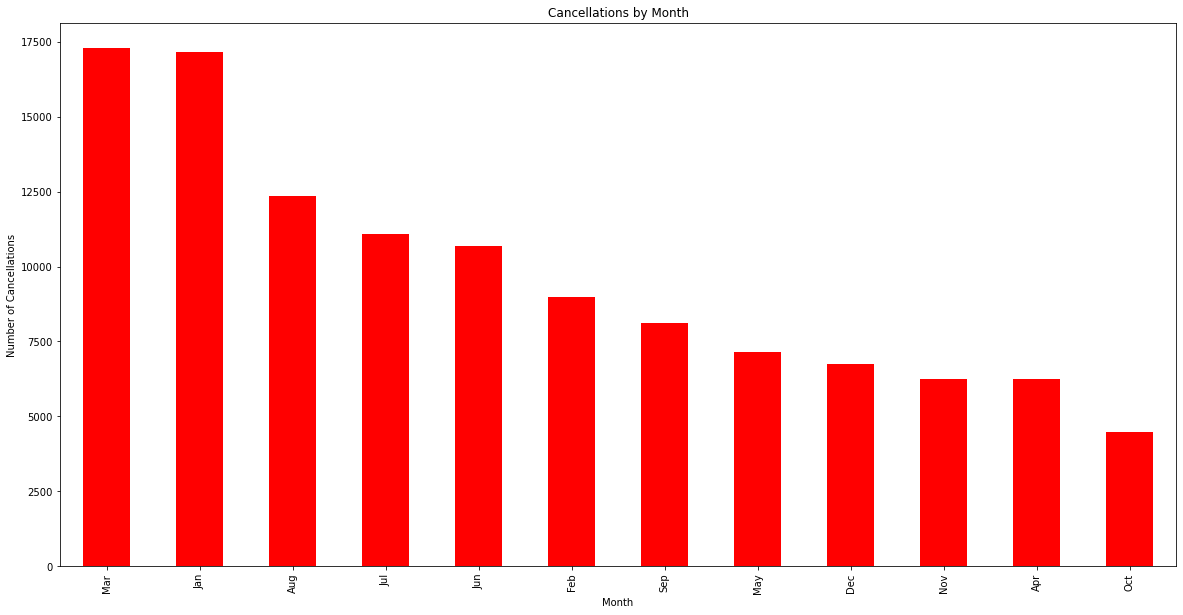

In [401]:
total_month_count = data_canceled.groupby(['month'])['month'].count().reset_index(name="count")
total_month_count_descending = total_month_count.sort_values(by = 'count', ascending=0)
total_month_count_descending.plot.bar(x='month', 
                                      y='count', 
                                      xlabel="Month", 
                                      ylabel="Number of Cancellations", 
                                      figsize = (20,10),
                                      color = "red",
                                      legend=False, 
                                      title = 'Cancellations by Month')

# 

### Number of cancellations by day of week

<AxesSubplot:title={'center':'Cancellations by Day of Week'}, xlabel='Day of Week', ylabel='Number of Cancellations'>

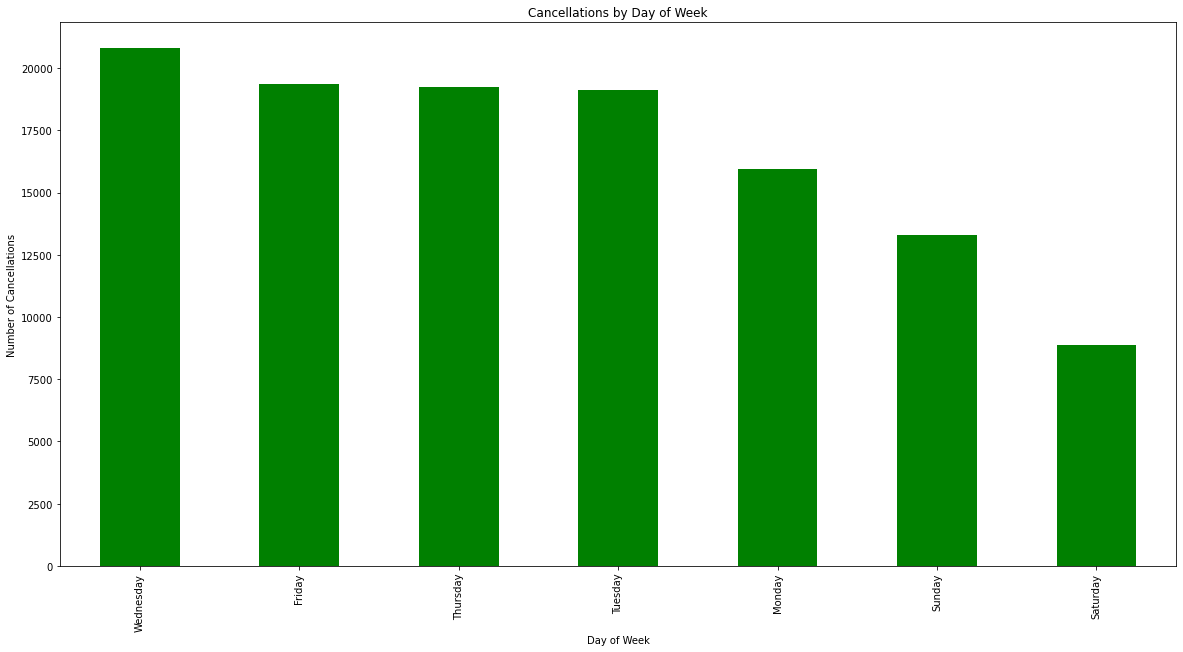

In [414]:
#Number of cancellations by day of week

total_weekday_count = data_canceled.groupby(['weekday'])['weekday'].count().reset_index(name="count")
total_weekday_count_descending = total_weekday_count.sort_values(by = 'count', ascending=0)
total_weekday_count_descending.plot.bar(x='weekday', 
                                        y='count',
                                        xlabel="Day of Week",
                                        ylabel="Number of Cancellations",
                                        figsize = (20,10), 
                                        color = "green",
                                        legend=False, 
                                        title = 'Cancellations by Day of Week',
                                        )

# 

### Number of cancellations by airline company

<AxesSubplot:title={'center':'Cancellations by Airline Company'}, xlabel='Airline Company', ylabel='Number of Cancellations'>

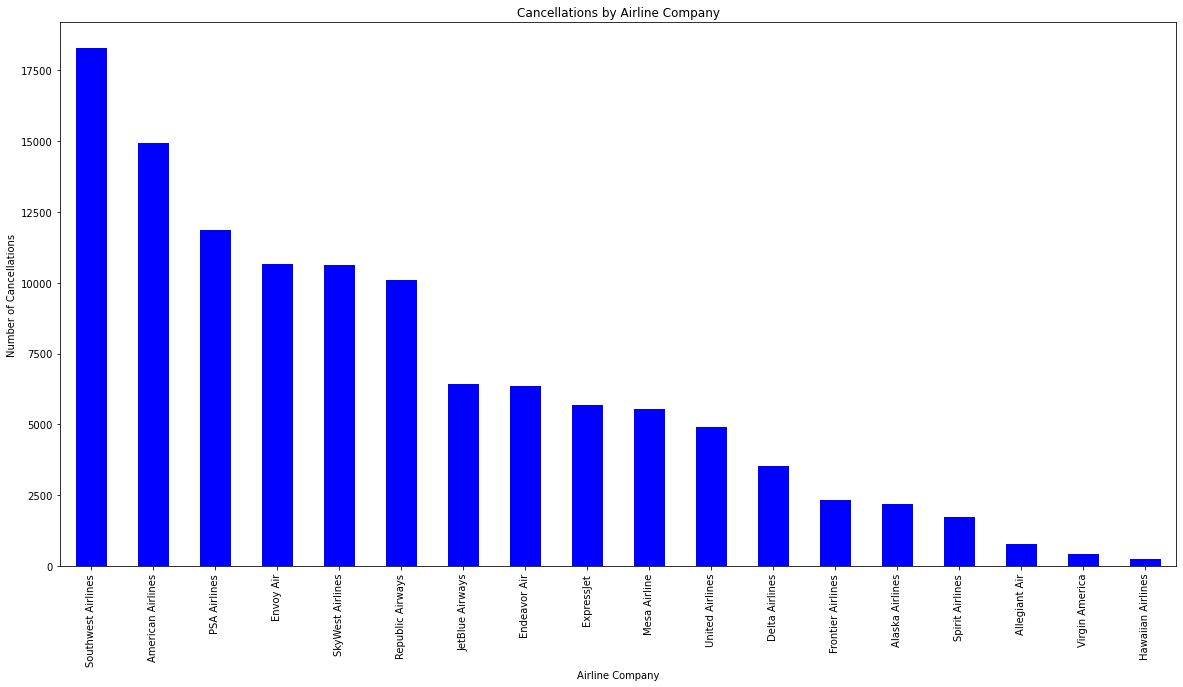

In [421]:
total_airline_count = data_canceled.groupby(['OP_CARRIER'])['OP_CARRIER'].count().reset_index(name="count")
total_airline_count_descending = total_airline_count.sort_values(by = 'count', ascending=0)
total_airline_count_descending.plot.bar(x='OP_CARRIER', 
                                        y='count', 
                                        xlabel="Airline Company", 
                                        ylabel="Number of Cancellations",
                                        figsize = (20,10), 
                                        color = "blue",
                                        legend=False, 
                                        title = 'Cancellations by Airline Company' 
                                        )


# 

### Number of cancellations by City Origin (top 20)

<AxesSubplot:title={'center':'Top 20 Cancellations by City Origin'}, xlabel='City Origin', ylabel='Number of Cancellations'>

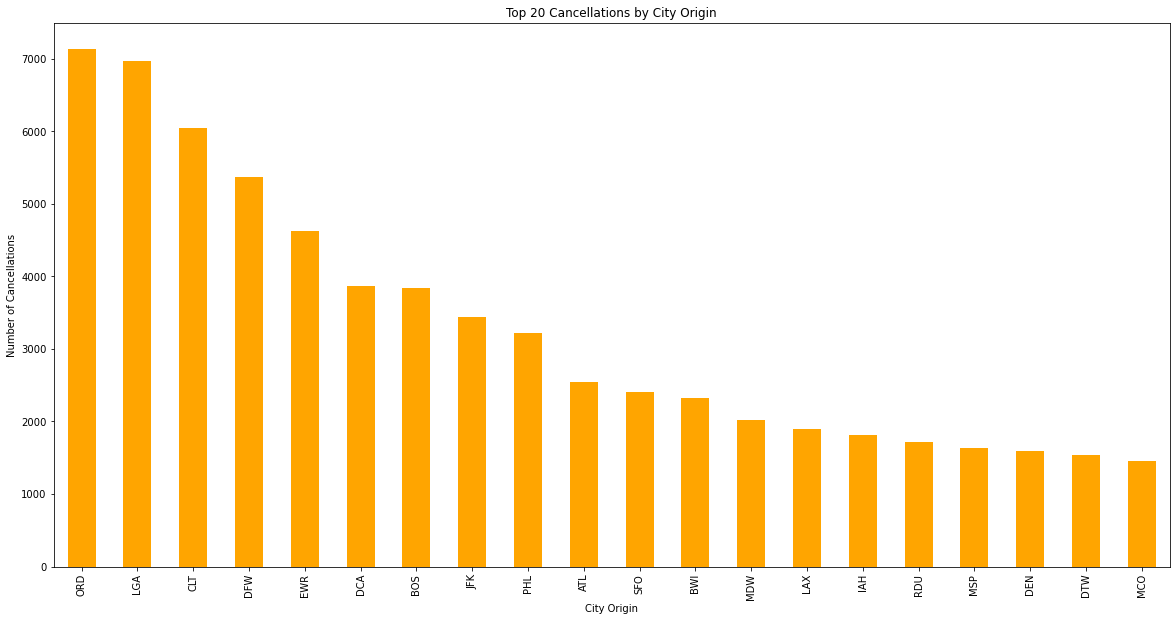

In [406]:
#Number of cancellations by City Origin (top 20)

total_city_origin_count = data_canceled.groupby(['ORIGIN'])['ORIGIN'].count().reset_index(name="count")
total_city_origin_count_descending = total_city_origin_count.sort_values(by = 'count', ascending=0).head(20)
total_city_origin_count_descending.plot.bar(x='ORIGIN', 
                                            y='count', 
                                            xlabel="City Origin",
                                            ylabel="Number of Cancellations",
                                            figsize = (20,10), 
                                            color = "orange",
                                            legend=False, 
                                            title = 'Top 20 Cancellations by City Origin', 
                                            )



# 

### Number of cancellations by time of planned departure

<AxesSubplot:title={'center':'Top 20 Cancellations by Planned Departure Time'}, xlabel='Planned Departure Time', ylabel='Number of Cancellations'>

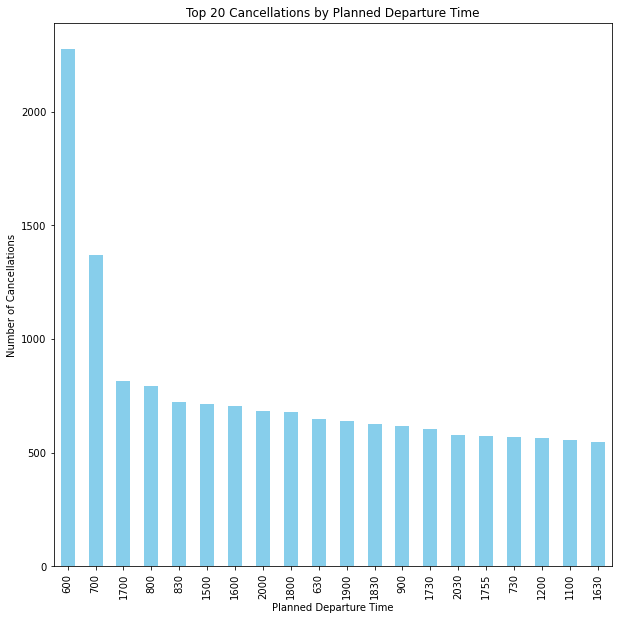

In [408]:
total_planned_departure_count = data_canceled.groupby(['CRS_DEP_TIME'])['CRS_DEP_TIME'].count().reset_index(name="count")
total_planned_departure_count_descending = total_planned_departure_count.sort_values(by = 'count', ascending=0).head(20)
total_planned_departure_count_descending.plot.bar(x='CRS_DEP_TIME', 
                                                  y='count', 
                                                  xlabel="Planned Departure Time",
                                                  ylabel="Number of Cancellations",
                                                  figsize = (10,10), 
                                                  color = "skyblue",
                                                  legend=False, 
                                                  title = 'Top 20 Cancellations by Planned Departure Time', 
                                                   )




# 

### Trying out box plot of 'date' by month and count

<AxesSubplot:>

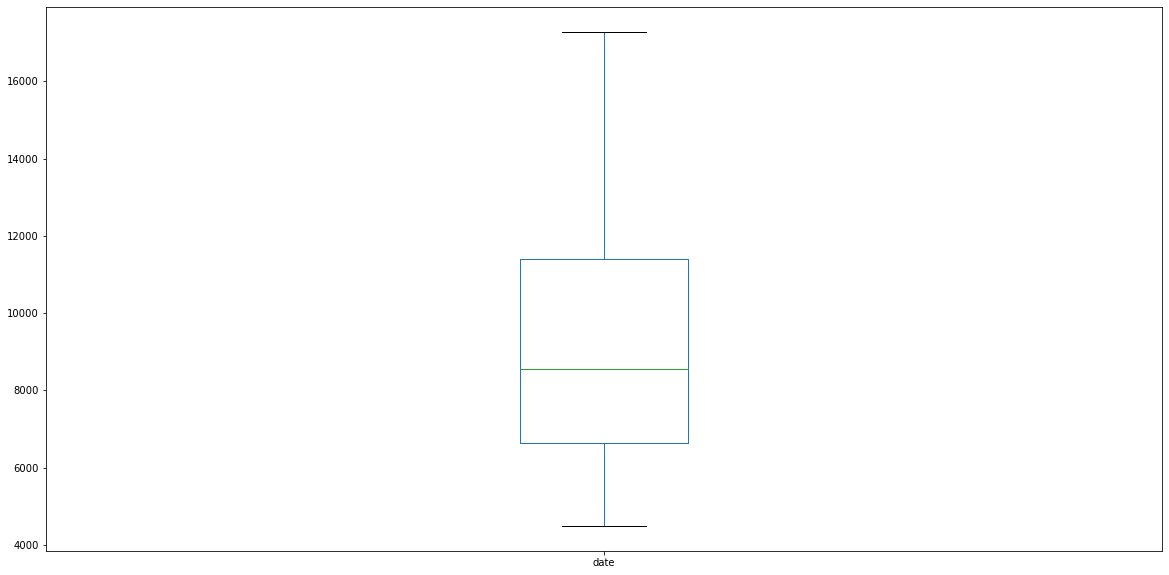

In [424]:
data_canceled['date'].groupby(data_canceled['date'].dt.to_period("M")).agg('count').plot(kind='box', figsize=(20,10))

# 

### "Arrivals" and "Departure" delays by month

In [439]:
data2018[data2018.ARR_DELAY > 0 ].shape[0]

2516050

In [435]:
# First we filter out the negative numbers because only positive numbers mean that there is a delay
data2018 = data2018[(data2018['ARR_DELAY'] > 0)]

In [440]:
# Convert Arrival minutes to hours 
data2018['ARR_DELAY'] = data2018['ARR_DELAY'] / 60

# Convert Departure minutes to hours 
data2018['DEP_DELAY'] = data2018['DEP_DELAY'] / 60

<ipython-input-440-f4c57e5fc28f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2018['ARR_DELAY'] = data2018['ARR_DELAY'] / 60
<ipython-input-440-f4c57e5fc28f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2018['DEP_DELAY'] = data2018['DEP_DELAY'] / 60


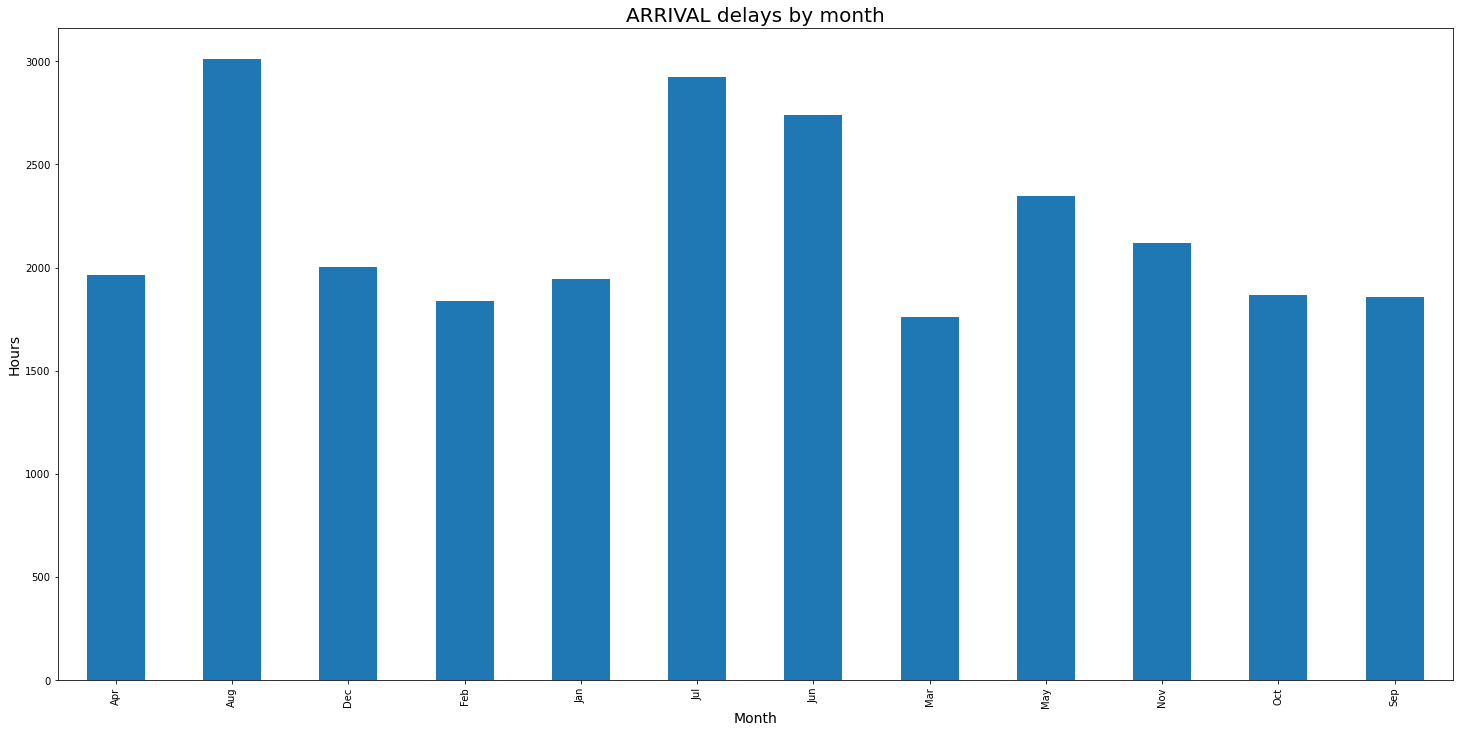

In [441]:
#Arrival delays by month
plt.figure(figsize=(25, 12))
data2018.groupby('month').ARR_DELAY.sum().plot.bar().set_title('ARRIVAL delays by month')
plt.title('ARRIVAL delays by month', fontsize=20)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month', fontsize=14)

plt.show()

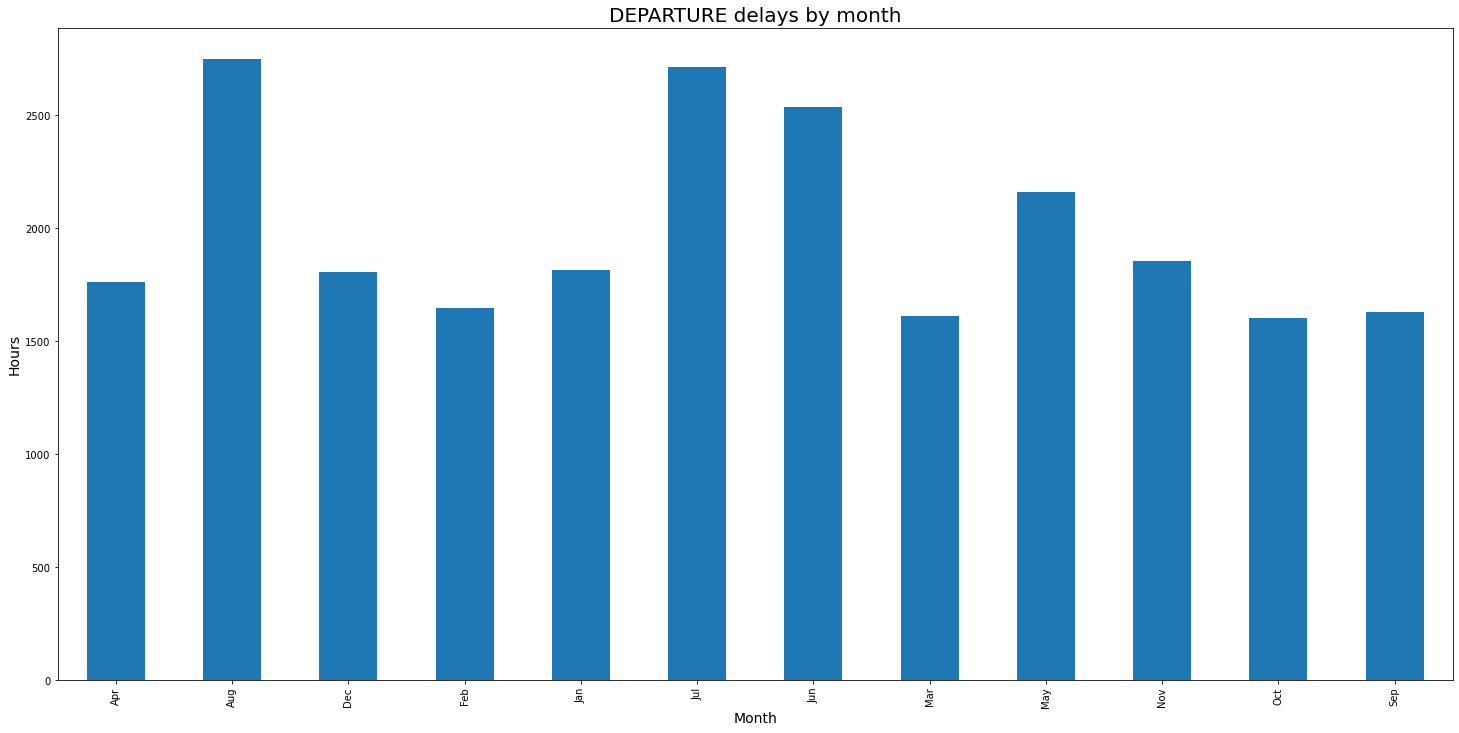

In [442]:
#Departure delays by month
plt.figure(figsize=(25, 12))
data2018.groupby('month').DEP_DELAY.sum().plot.bar()
plt.title('DEPARTURE delays by month', fontsize=20
         )
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month', fontsize=14)

plt.show()

# 

### Delays by Airline Company

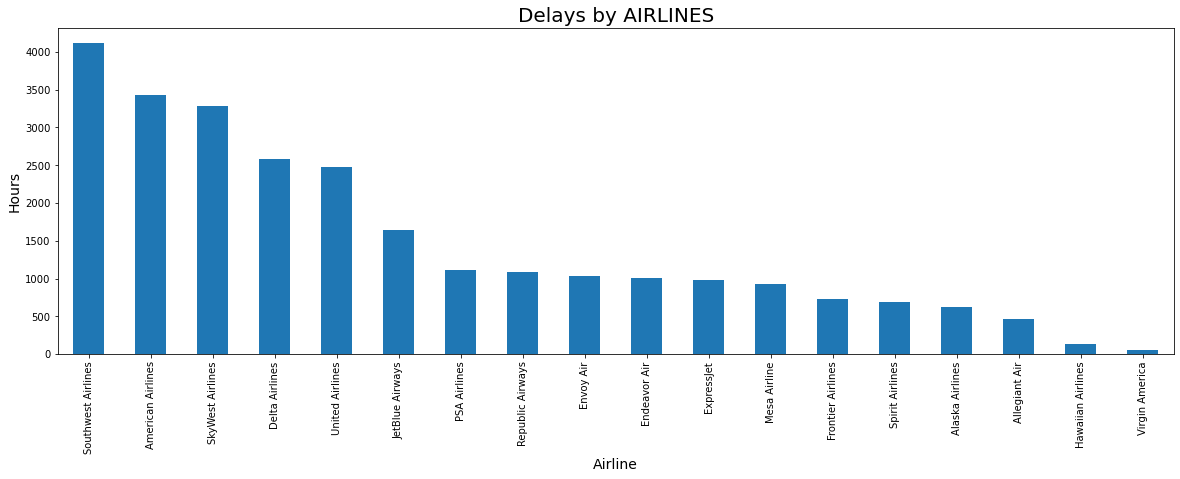

In [447]:
plt.figure(figsize=(20, 6))

data2018.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()

plt.title('Delays by AIRLINES', fontsize=20)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Hours', fontsize=14)

plt.show()

# 

### Delays by Airport

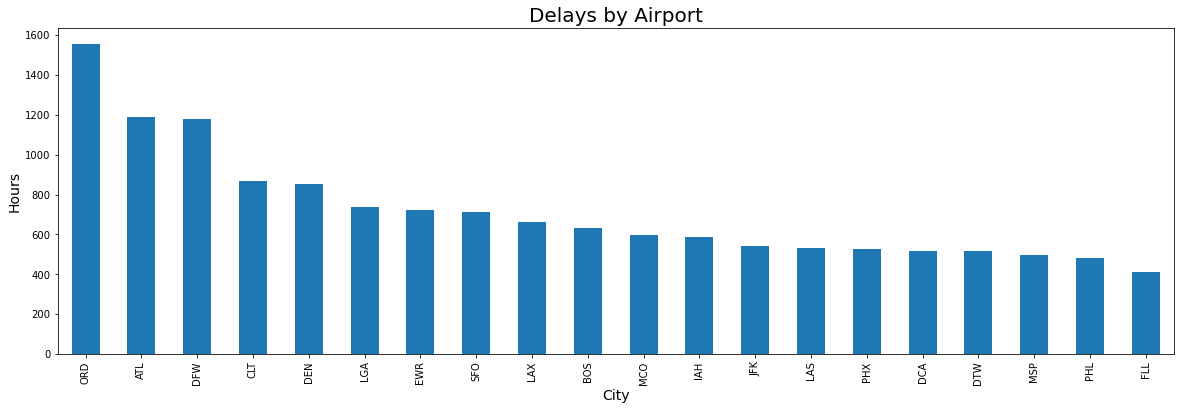

In [446]:
airport_delay = data2018.groupby('ORIGIN').ARR_DELAY.sum().sort_values(ascending=False)

plt.figure(figsize=(20, 6))

airport_delay[:20].plot.bar()

plt.title('Delays by Airport', fontsize=20)
plt.xlabel('City', fontsize=14)
plt.ylabel('Hours', fontsize=14)

plt.show()